In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# To build model for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from scikitplot.metrics import plot_confusion_matrix
# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

### Problem 1

The comp-activ database comprises activity measures of computer systems. Data was gathered from a Sun Sparcstation 20/712 with 128 Mbytes of memory, operating in a multi-user university department. Users engaged in diverse tasks, such as internet access, file editing, and CPU-intensive programs.

Being an aspiring data scientist, you aim to establish a linear equation for predicting 'usr' (the percentage of time CPUs operate in user mode). Your goal is to analyze various system attributes to understand their influence on the system's 'usr' mode.

In [243]:
comp_data=pd.read_excel(r"C:\Users\Nitheesh\Downloads\compactiv.xlsx")

In [244]:
comp_data.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.20000,0.20000,40671.00000,53995.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.60000,2.60000,16.00000,26.40000,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.20000,0.20000,448.00000,8385.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,15.63000,16.83000,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.00000,2.40000,NaN,31950.00000,0.00000,0.00000,0.00000,0.00000,1.20000,6.00000,9.40000,150.20000,220.20000,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.20000,0.20000,NaN,8670.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.20000,0.20000,15.60000,16.80000,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.40000,0.40000,NaN,12185.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.20000,37.80000,47.60000,Not_CPU_Bound,633,1760253,90


System measures used:

lread - Reads (transfers per second ) between system memory and user memory
lwrite - writes (transfers per second) between system memory and user memory
scall - Number of system calls of all types per second
sread - Number of system read calls per second .
swrite - Number of system write calls per second .
fork - Number of system fork calls per second.
exec - Number of system exec calls per second.
rchar - Number of characters transferred per second by system read calls
wchar - Number of characters transfreed per second by system write calls
pgout - Number of page out requests per second
ppgout - Number of pages, paged out per second
pgfree - Number of pages per second placed on the free list.
pgscan - Number of pages checked if they can be freed per second
atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second
pgin - Number of page-in requests per second
ppgin - Number of pages paged in per second
pflt - Number of page faults caused by protection errors (copy-on-writes).
vflt - Number of page faults caused by address translation .
runqsz - Process run queue size (The number of kernel threads in memory that are waiting for a CPU to run.
Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.)
freemem - Number of memory pages available to user processes
freeswap - Number of disk blocks available for page swapping.

In [4]:
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

The DataFrame consists of 22 columns and 8192 entries. Data types include int64, float64, and one "object" column ("runqsz"). Notably, columns such as "rchar" and "wchar" contain missing values. A deeper analysis, addressing missing values, and leveraging domain knowledge are essential for interpreting metrics in the system or application context.

##### Duplicate row check

In [245]:
dups = comp_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(comp_data.shape)

Number of duplicate rows = 0
(8192, 22)


In [6]:
column_names = comp_data.columns
print(column_names)

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')


###### Statistical Summary

In [236]:
comp_data.describe().T

,count,mean,std,min,25%,50%,75%,max
lread,8192.00000,19.55969,53.35380,0.00000,2.00000,7.00000,20.00000,1845.00000
lwrite,8192.00000,13.10620,29.89173,0.00000,0.00000,1.00000,10.00000,575.00000
scall,8192.00000,2306.31824,1633.61732,109.00000,1012.00000,2051.50000,3317.25000,12493.00000
sread,8192.00000,210.47998,198.98015,6.00000,86.00000,166.00000,279.00000,5318.00000
swrite,8192.00000,150.05823,160.47898,7.00000,63.00000,117.00000,185.00000,5456.00000
fork,8192.00000,1.88455,2.47949,0.00000,0.40000,0.80000,2.20000,20.12000
exec,8192.00000,2.79200,5.21246,0.00000,0.20000,1.20000,2.80000,59.56000
rchar,8192.00000,197385.72836,238310.03774,278.00000,34860.50000,127825.00000,265394.75000,2526649.00000
wchar,8192.00000,95902.99278,140712.68864,1498.00000,22977.75000,46653.00000,106037.00000,1801623.00000
pgout,8192.00000,2.28532,5.30704,0.00000,0.00000,0.00000,2.40000,81.44000


##### Univariate analysis

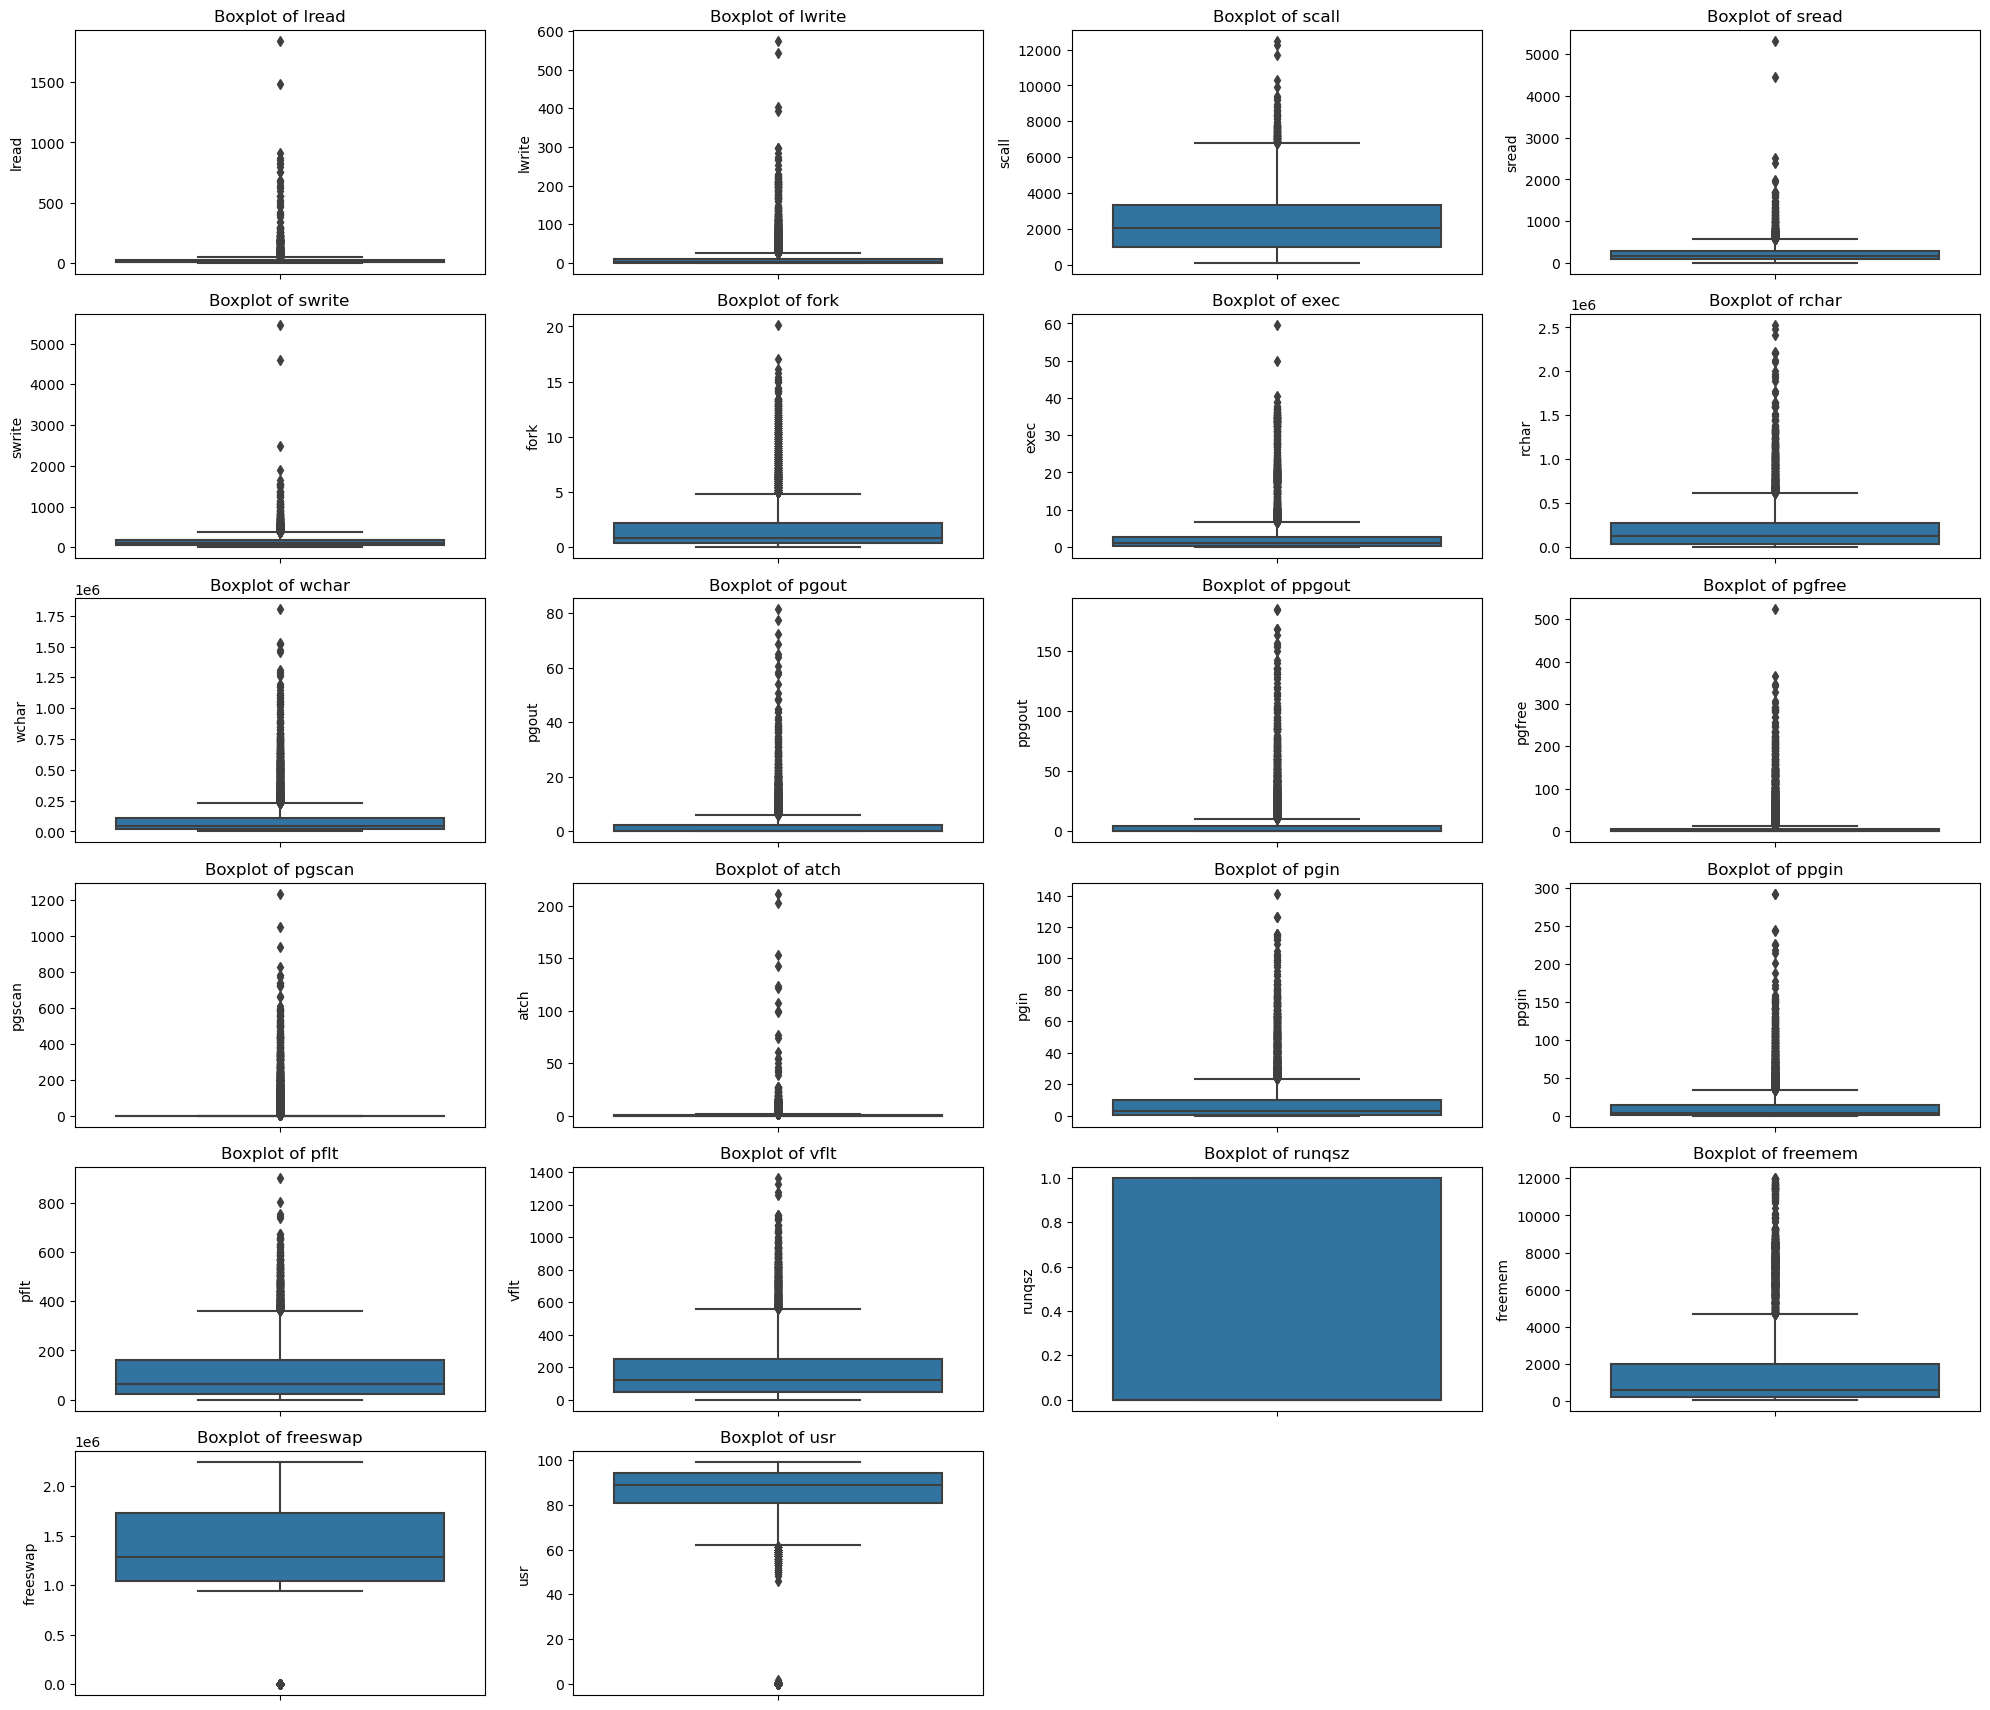

In [12]:
plt.figure(figsize = (20,20))
feature_list = comp_data.columns
for i in range(len(feature_list)):
    plt.subplot(7, 4, i + 1)
    sns.boxplot(y = comp_data[feature_list[i]], data = comp_data)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

Maintaining the integrity of the dataset is crucial, and altering or treating outliers can have a significant impact on the overall representation of the data. In this context, it is advisable to refrain from treating outliers and to retain the data in its original form. Modifying or removing outliers may distort the natural variability and characteristics of the dataset, potentially leading to a misinterpretation of patterns and trends. 

##### Multivariate analysis

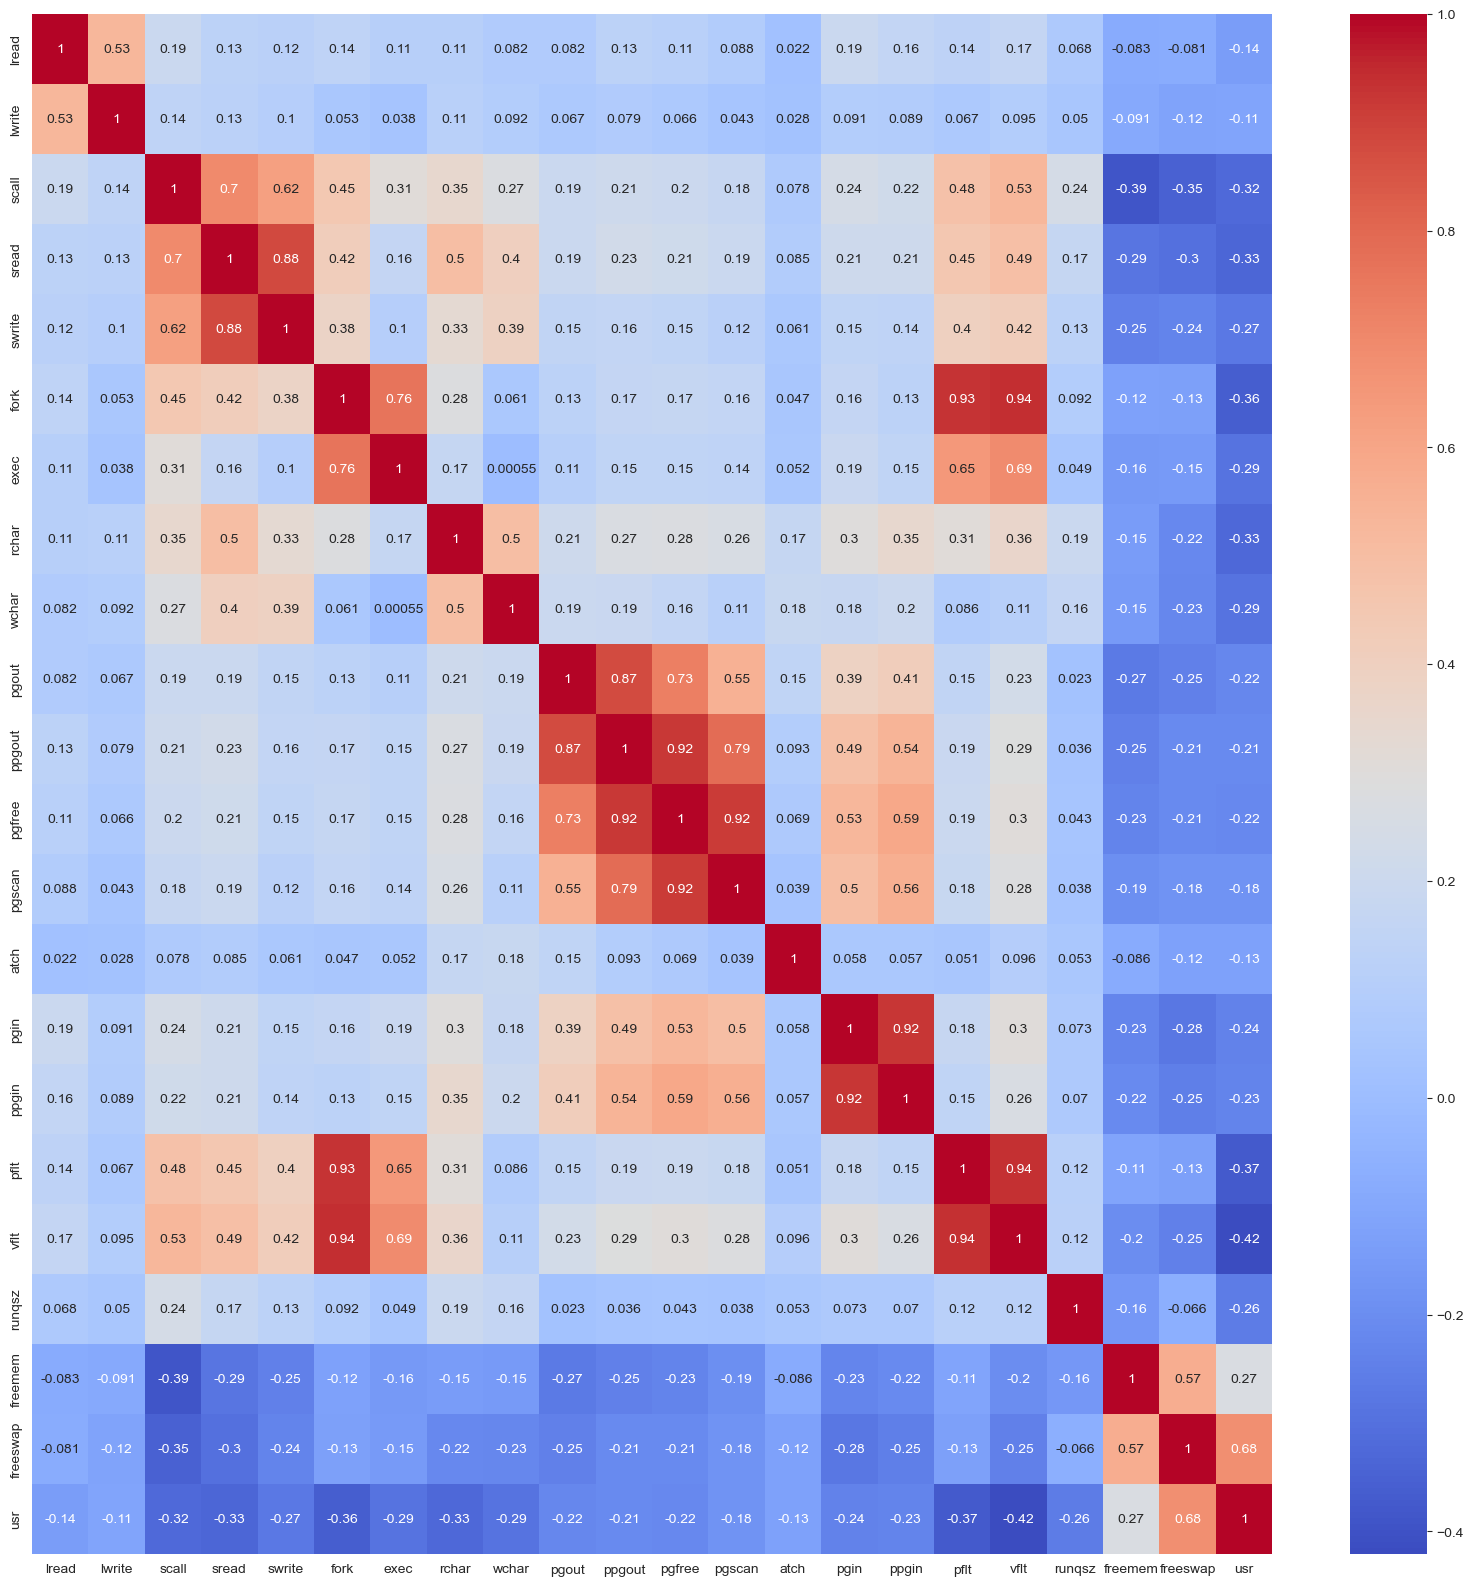

In [239]:
plt.figure(figsize = (20,20))
correlation_matrix = comp_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

##### Data Preprocessing

Filling missing values in column rchar and wchar with their means

In [246]:
comp_data.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [247]:
comp_data['rchar'].fillna(comp_data['rchar'].mean(), inplace=True)
comp_data['wchar'].fillna(comp_data['wchar'].mean(), inplace=True)

Counting the unique values for object column 'runqsz' and coding into int values

In [248]:
comp_data['runqsz'].nunique()
comp_data['runqsz'].value_counts().sort_values()

CPU_Bound        3861
Not_CPU_Bound    4331
Name: runqsz, dtype: int64

Since there are only 2 uniques values, the runqsz column is binary coded

In [249]:
comp_data['runqsz'] = comp_data['runqsz'].replace({'Not_CPU_Bound':0,'CPU_Bound':1})
comp_data['runqsz'].value_counts()

0    4331
1    3861
Name: runqsz, dtype: int64

In [14]:
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   float64
 8   wchar     8192 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   int64  
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

All the data types in the column are converted into numerical values

##### Split Data

In [17]:
X = comp_data.drop('usr', axis=1)

Y = comp_data['usr']

In [18]:
X = sm.add_constant(X)

Split X and y into train and test sets in a 70:30 ratio

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.30, random_state=45)

#### Model Building- Linear regression

Fit Linear Model by Ordinary Least Squares (OLS) method

In [20]:
olsmod = sm.OLS(Y_train, X_train)
olsres = olsmod.fit()

In [21]:
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     469.1
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:08:35   Log-Likelihood:                -21881.
No. Observations:                5734   AIC:                         4.381e+04
Df Residuals:                    5712   BIC:                         4.395e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.4462      0.703     73.153      0.0

The R-squared value tells us that our model can explain 63.3% of the variance in the training set. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable. If the level of significance is set to 5% (0.05), the p-values greater than 0.05 would indicate that the corresponding predictor variables are not significant. However, due to the presence of multicollinearity in our data, the p-values will also change. We need to ensure that there is no multicollinearity in order to interpret the p-values.

Here to check multicolinearity we use Variance Inflation factor (VIF) method.

In [22]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const      23.38823
lread       1.53508
lwrite      1.45639
scall       2.49138
sread       6.63108
swrite      5.39401
fork       18.00315
exec        3.18749
rchar       1.96682
wchar       1.60491
pgout       5.79349
ppgout     16.11035
pgfree     16.70359
pgscan      6.89072
atch        1.09716
pgin        7.10787
ppgin       7.47618
pflt       11.32574
vflt       18.98778
runqsz      1.11842
freemem     1.67550
freeswap    1.73875
dtype: float64



The VIF values indicate that the features fork, vflt, ppgout, and pgfre are correlated with one or more independent features. To treat multicollinearity, we will have to drop one or more of the correlated features and we will drop the variable that has the least impact on the adjusted R-squared of the model.

In [23]:
X_train2 = X_train.drop(["vflt"], axis=1)
olsmod_1 = sm.OLS(Y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.63 
Adjusted R-squared: 0.629


In [24]:
X_train3 = X_train.drop(["fork"], axis=1)
olsmod_2 = sm.OLS(Y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.63 
Adjusted R-squared: 0.629


Since both the columns dont show much drop in r square value we are dropping vflt which has high VIF value.

In [25]:
X_train = X_train.drop(["vflt"], axis=1)
olsmod_3 = sm.OLS(Y_train, X_train)
olsres_3 = olsmod_3.fit()
print(olsres_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     486.4
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:28:13   Log-Likelihood:                -21904.
No. Observations:                5734   AIC:                         4.385e+04
Df Residuals:                    5713   BIC:                         4.399e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.6249      0.684     76.890      0.0

In [26]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const      21.97614
lread       1.53069
lwrite      1.44447
scall       2.44890
sread       6.60180
swrite      5.36423
fork       12.40257
exec        3.16886
rchar       1.95064
wchar       1.59636
pgout       5.78207
ppgout     16.10862
pgfree     16.43344
pgscan      6.88974
atch        1.07539
pgin        6.66297
ppgin       7.32865
pflt        8.60472
runqsz      1.11842
freemem     1.67547
freeswap    1.64361
dtype: float64



In [27]:
X_train4 = X_train.drop(["ppgout"], axis=1)
olsmod_4 = sm.OLS(Y_train, X_train4)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.629 
Adjusted R-squared: 0.628


In [28]:
X_train5 = X_train.drop(["pgfree"], axis=1)
olsmod_5 = sm.OLS(Y_train, X_train5)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.629 
Adjusted R-squared: 0.628


In [29]:
X_train = X_train.drop(["ppgout"], axis=1)
olsmod_6 = sm.OLS(Y_train, X_train)
olsres_6 = olsmod_6.fit()
print(olsres_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     510.5
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:32:08   Log-Likelihood:                -21910.
No. Observations:                5734   AIC:                         4.386e+04
Df Residuals:                    5714   BIC:                         4.399e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.4022      0.682     76.866      0.0

In [30]:
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const      21.76566
lread       1.50915
lwrite      1.44194
scall       2.44752
sread       6.55640
swrite      5.35458
fork       12.40252
exec        3.16413
rchar       1.95001
wchar       1.59242
pgout       2.59746
pgfree     10.41087
pgscan      6.88362
atch        1.07200
pgin        6.63654
ppgin       7.30013
pflt        8.59961
runqsz      1.11839
freemem     1.67481
freeswap    1.63560
dtype: float64



In [31]:
X_train6 = X_train.drop(["fork"], axis=1)
olsmod_7 = sm.OLS(Y_train, X_train6)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)

R-squared: 0.629 
Adjusted R-squared: 0.627


In [32]:
X_train = X_train.drop(["fork"], axis=1)
olsmod_8 = sm.OLS(Y_train, X_train)
olsres_8 = olsmod_8.fit()
print(olsres_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     537.4
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:32:27   Log-Likelihood:                -21915.
No. Observations:                5734   AIC:                         4.387e+04
Df Residuals:                    5715   BIC:                         4.399e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.5933      0.680     77.374      0.0

In [33]:
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series4))

VIF values: 

const      21.60187
lread       1.50446
lwrite      1.43744
scall       2.42347
sread       6.55076
swrite      5.15002
exec        1.91955
rchar       1.94923
wchar       1.58081
pgout       2.59692
pgfree     10.41011
pgscan      6.88271
atch        1.07198
pgin        6.63644
ppgin       7.29695
pflt        2.39202
runqsz      1.11804
freemem     1.67459
freeswap    1.63520
dtype: float64



In [34]:
X_train7 = X_train.drop(["pgfree"], axis=1)
olsmod_9 = sm.OLS(Y_train, X_train7)
olsres_9 = olsmod_9.fit()
print(
    "R-squared:",
    np.round(olsres_9.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_9.rsquared_adj, 3),
)

R-squared: 0.628 
Adjusted R-squared: 0.627


In [35]:
X_train = X_train.drop(["pgfree"], axis=1)
olsmod_10 = sm.OLS(Y_train, X_train)
olsres_10 = olsmod_10.fit()
print(olsres_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     568.4
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:32:38   Log-Likelihood:                -21917.
No. Observations:                5734   AIC:                         4.387e+04
Df Residuals:                    5716   BIC:                         4.399e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.6535      0.679     77.514      0.0

In [36]:
vif_series5 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series5))

VIF values: 

const      21.56119
lread       1.50043
lwrite      1.43722
scall       2.42282
sread       6.54631
swrite      5.14686
exec        1.91891
rchar       1.94442
wchar       1.58079
pgout       1.49387
pgscan      1.76331
atch        1.07081
pgin        6.63303
ppgin       7.27759
pflt        2.39063
runqsz      1.11804
freemem     1.67415
freeswap    1.63361
dtype: float64



In [37]:
X_train8 = X_train.drop(["ppgin"], axis=1)
olsmod_11 = sm.OLS(Y_train, X_train8)
olsres_11 = olsmod_11.fit()
print(
    "R-squared:",
    np.round(olsres_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_11.rsquared_adj, 3),
)

R-squared: 0.628 
Adjusted R-squared: 0.627


In [38]:
X_train = X_train.drop(["ppgin"], axis=1)
olsmod_12 = sm.OLS(Y_train, X_train)
olsres_12 = olsmod_12.fit()
print(olsres_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     603.2
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:32:50   Log-Likelihood:                -21919.
No. Observations:                5734   AIC:                         4.387e+04
Df Residuals:                    5717   BIC:                         4.399e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.7035      0.679     77.602      0.0

In [39]:
vif_series6 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series6))

VIF values: 

const      21.53817
lread       1.49633
lwrite      1.43618
scall       2.42122
sread       6.54620
swrite      5.14673
exec        1.91838
rchar       1.89447
wchar       1.58020
pgout       1.49301
pgscan      1.62709
atch        1.07017
pgin        1.49766
pflt        2.38112
runqsz      1.11804
freemem     1.67410
freeswap    1.63145
dtype: float64



In [40]:
X_train9 = X_train.drop(["sread"], axis=1)
olsmod_13 = sm.OLS(Y_train, X_train9)
olsres_13 = olsmod_13.fit()
print(
    "R-squared:",
    np.round(olsres_13.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_13.rsquared_adj, 3),
)

R-squared: 0.628 
Adjusted R-squared: 0.627


In [41]:
X_train = X_train.drop(["sread"], axis=1)
olsmod_14 = sm.OLS(Y_train, X_train)
olsres_14 = olsmod_14.fit()
print(olsres_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     643.4
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:33:11   Log-Likelihood:                -21920.
No. Observations:                5734   AIC:                         4.387e+04
Df Residuals:                    5718   BIC:                         4.398e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.7310      0.678     77.776      0.0

In [42]:
vif_series7 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series7))

VIF values: 

const      21.46590
lread       1.49450
lwrite      1.43479
scall       2.20866
swrite      2.10178
exec        1.91350
rchar       1.58265
wchar       1.57235
pgout       1.49232
pgscan      1.61841
atch        1.07014
pgin        1.49273
pflt        2.36959
runqsz      1.11774
freemem     1.67410
freeswap    1.62303
dtype: float64



In [43]:
X_train10 = X_train.drop(["pflt"], axis=1)
olsmod_15 = sm.OLS(Y_train, X_train10)
olsres_15 = olsmod_15.fit()
print(
    "R-squared:",
    np.round(olsres_15.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_15.rsquared_adj, 3),
)

R-squared: 0.601 
Adjusted R-squared: 0.6


In [44]:
X_train11 = X_train.drop(["scall"], axis=1)
olsmod_16 = sm.OLS(Y_train, X_train11)
olsres_16 = olsmod_15.fit()
print(
    "R-squared:",
    np.round(olsres_16.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_16.rsquared_adj, 3),
)

R-squared: 0.601 
Adjusted R-squared: 0.6


In [45]:
X_train12 = X_train.drop(["swrite"], axis=1)
olsmod_17 = sm.OLS(Y_train, X_train12)
olsres_17 = olsmod_17.fit()
print(
    "R-squared:",
    np.round(olsres_17.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_17.rsquared_adj, 3),
)

R-squared: 0.628 
Adjusted R-squared: 0.627


Here taking all the three columns with high VIF values still 'swrite' show least r-square value drop compared to others so we drop that column.

In [46]:
X_train = X_train.drop(["swrite"], axis=1)
olsmod_18 = sm.OLS(Y_train, X_train)
olsres_18 = olsmod_18.fit()
print(olsres_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     688.5
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:35:10   Log-Likelihood:                -21922.
No. Observations:                5734   AIC:                         4.387e+04
Df Residuals:                    5719   BIC:                         4.397e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.7090      0.678     77.725      0.0

In [47]:
vif_series8 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series8))

VIF values: 

const      21.46146
lread       1.49448
lwrite      1.43479
scall       1.71848
exec        1.78143
rchar       1.58237
wchar       1.41759
pgout       1.49192
pgscan      1.61827
atch        1.06908
pgin        1.49196
pflt        2.15055
runqsz      1.10707
freemem     1.66874
freeswap    1.62303
dtype: float64



In [48]:
X_train13 = X_train.drop(["pflt"], axis=1)
olsmod_19 = sm.OLS(Y_train, X_train13)
olsres_19 = olsmod_19.fit()
print(
    "R-squared:",
    np.round(olsres_19.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_19.rsquared_adj, 3),
)

R-squared: 0.596 
Adjusted R-squared: 0.595


Dropping 'pflt'column will show a drop of .032 This sharp decline indicates that 'pflt' is an important predictor and shouldn't be removed. Now that we do not have multicollinearity in our data, the p-values of the coefficients have become reliable and we can remove the non-significant predictor variables.

Since atch has p-value greater than .05 it can be drop it because it is not significant in predicting 'usr'.

In [49]:
X_train = X_train.drop(["atch"], axis=1)
olsmod_19 = sm.OLS(Y_train, X_train)
olsres_19 = olsmod_19.fit()
print(olsres_19.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     741.6
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:43:00   Log-Likelihood:                -21922.
No. Observations:                5734   AIC:                         4.387e+04
Df Residuals:                    5720   BIC:                         4.397e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.7087      0.677     77.833      0.0

In [50]:
X_train = X_train.drop(["pgin"], axis=1)
olsmod_20 = sm.OLS(Y_train, X_train)
olsres_20 = olsmod_20.fit()
print(olsres_20.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     803.4
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:43:45   Log-Likelihood:                -21923.
No. Observations:                5734   AIC:                         4.387e+04
Df Residuals:                    5721   BIC:                         4.396e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.8232      0.667     79.210      0.0

In [51]:
X_train = X_train.drop(["pgscan"], axis=1)
olsmod_21 = sm.OLS(Y_train, X_train)
olsres_21 = olsmod_21.fit()
print(olsres_21.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     876.4
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:44:19   Log-Likelihood:                -21923.
No. Observations:                5734   AIC:                         4.387e+04
Df Residuals:                    5722   BIC:                         4.395e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.8210      0.667     79.211      0.0

In [52]:
X_train = X_train.drop(["lwrite"], axis=1)
olsmod_22 = sm.OLS(Y_train, X_train)
olsres_22 = olsmod_22.fit()
print(olsres_22.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     963.9
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:44:58   Log-Likelihood:                -21924.
No. Observations:                5734   AIC:                         4.387e+04
Df Residuals:                    5723   BIC:                         4.394e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.9006      0.663     79.748      0.0

After dropping the features causing strong multicollinearity and the statistically insignificant ones, our model performance hasn't dropped sharply (adj. R-squared has dropped from 0.633 to 0.627). This shows that these variables did not have much predictive power.

In [55]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = Y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_18.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_18.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,91,84.60846,6.39154
1,97,104.33519,-7.33519
2,98,99.69600,-1.69600
3,81,70.36947,10.63053
4,59,66.89701,-7.89701


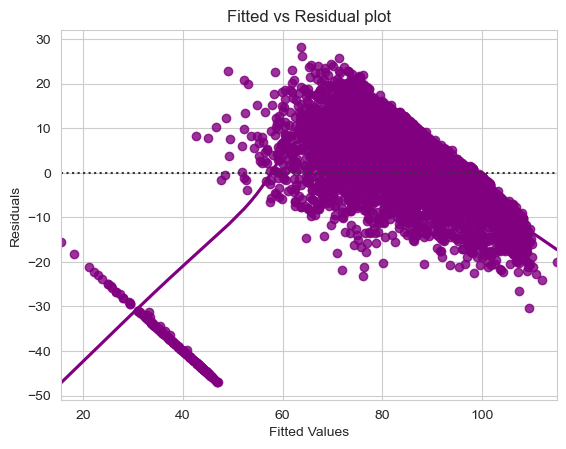

In [56]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [ ]:
We observe that the data points seems to be randomly distributed.

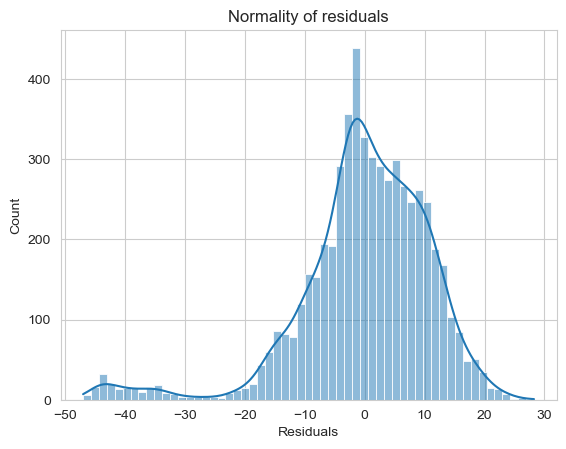

In [57]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

The residual terms are normally distributed.

In [58]:
from scipy.stats import shapiro


In [59]:
shapiro_test_statistic, shapiro_p_value = shapiro(df_pred["Residuals"])

print("Shapiro-Wilk Test Statistic:", shapiro_test_statistic)
print("p-value:", shapiro_p_value)

Shapiro-Wilk Test Statistic: 0.9098716974258423
p-value: 0.0


Since p-value < 0.05, the residuals are not normal as per shapiro test.
Strictly speaking the residuals are not normal. However, as an approximation, we might be willing to accept this distribution as close to being normal

In [61]:
print(olsres_22.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     963.9
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:58:17   Log-Likelihood:                -21924.
No. Observations:                5734   AIC:                         4.387e+04
Df Residuals:                    5723   BIC:                         4.394e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.9006      0.663     79.748      0.0

In [62]:
olsres_22.params

const      52.90057
lread      -0.01850
scall       0.00110
exec       -0.18046
rchar      -0.00000
wchar      -0.00001
pgout      -0.12360
pflt       -0.04188
runqsz     -7.70171
freemem    -0.00162
freeswap    0.00003
dtype: float64

Observations
R-squared of the model is 0.627 and adjusted R-squared is 0.627, which shows that the model is able to explain ~63% variance in the data. This is acceptable.


In [64]:
X_train.columns

Index(['const', 'lread', 'scall', 'exec', 'rchar', 'wchar', 'pgout', 'pflt',
       'runqsz', 'freemem', 'freeswap'],
      dtype='object')

In [65]:
X_test.columns

Index(['const', 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec',
       'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin',
       'ppgin', 'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap'],
      dtype='object')

In [74]:
# dropping columns from the test data that are not there in the training data
X_test2 = X_test.drop(
    ["lwrite", "sread", "swrite", "fork","ppgout","pgfree","pgscan",'atch', 'pgin',
       'ppgin','vflt'], axis=1
)

In [75]:
y_pred = olsres_22.predict(X_test2)

In [71]:
# let's check the RMSE on the train data
from sklearn.metrics import mean_absolute_error, mean_squared_error
rmse1 = np.sqrt(mean_squared_error(Y_train, df_pred["Fitted Values"]))
rmse1

11.070242493166365

In [77]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(Y_test, y_pred))
rmse2

11.315202631283238

In [73]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(Y_train, df_pred["Fitted Values"])
mae1

7.960918633721773

In [79]:
# let's check the MAE on the test data
mae2 = mean_absolute_error(Y_test, y_pred)
mae2

8.042331392504487

We can see that RMSE on the train and test sets are comparable. So, our model is not suffering from overfitting.
MAE indicates that our current model is able to predict 'usr' within a mean error of 8 units on the test data.
Hence, we can conclude the model "ols_res22" is good for prediction as well as inference purposes.

In [80]:
# Let us write the equation of linear regression
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(olsres_22.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            olsres_22.params[i],
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_22.params[i], "* (", X_train.columns[i], ")")

usr = 52.90057082890075 + -0.018498370719464197 * ( lread ) +  0.0011003313429894998 * ( scall ) +  -0.1804560163921101 * ( exec ) +  -2.811673484258259e-06 * ( rchar ) +  -1.1457999795106489e-05 * ( wchar ) +  -0.12359535817219577 * ( pgout ) +  -0.041883924594285526 * ( pflt ) +  -7.701707832272019 * ( runqsz ) +  -0.001624890625890328 * ( freemem ) +  3.197991576345842e-05 * ( freeswap )


###### Business Insights & Recommendations

The intercept value 52.9 represents the expected value of usr when all independent variables are zero. In this context, it provides a baseline level for the usr variable. Analyzing the variables and it co-efficients the most relevant variables are

runqsz (Process run queue size): A one-unit increase in runqsz is associated with a decrease of approximately 7.7017 in usr.
pgout (Number of page out requests per second): A one-unit increase in pgout is associated with a decrease of approximately 0.1236 in usr.
exec (Number of system exec calls per second): A one-unit increase in exec is associated with a decrease of approximately 0.1805 in usr.
lread (Reads between system memory and user memory): A one-unit increase in lread is associated with a decrease of approximately 0.0185 in usr.
pflt (Number of page faults caused by protection errors): A one-unit increase in pflt is associated with a decrease of approximately 0.0419 in usr.
freemem (Number of memory pages available to user processes): A one-unit increase in freemem is associated with a decrease of approximately 0.0016 in usr.



System Optimization:

Optimize the system to minimize the number of protection errors (pflt) and address translation faults (vflt) to improve the percentage of time CPUs spend in user mode ('usr').
Memory Management:

Ensure efficient memory management to maintain an adequate number of memory pages available to user processes ('freemem'). Monitor and manage disk blocks available for page swapping ('freeswap') to avoid performance degradation.
Process Execution Efficiency:

Enhance the efficiency of system execution by minimizing the number of system exec calls per second ('exec').
System Health Monitoring:

Regularly monitor the system health, particularly the run queue size ('runqsz'). A consistently high run queue size may indicate CPU-bound conditions, requiring further investigation and potentially system upgrades.
Performance Optimization:

Focus on optimizing read and write operations between system and user memory, as indicated by the coefficients for 'lread' and 'lwrite'. Consider performance tuning strategies to improve efficiency.
Capacity Planning:

Plan for system capacity by understanding the impact of system calls ('scall') on the percentage of time CPUs spend in user mode. Ensure that the system can handle the expected workload efficiently.

## Problem 2

In your role as a statistician at the Republic of Indonesia Ministry of Health, you have been entrusted with a dataset containing information from a Contraceptive Prevalence Survey. This dataset encompasses data from 1473 married females who were either not pregnant or were uncertain of their pregnancy status during the survey.

Your task involves predicting whether these women opt for a contraceptive method of choice. This prediction will be based on a comprehensive analysis of their demographic and socio-economic attributes.

In [255]:
h_data=pd.read_excel(r"C:\Users\Nitheesh\Downloads\Contraceptive_method_dataset.xlsx")

In [256]:
h_data.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.00000,Primary,Secondary,3.00000,Scientology,No,2,High,Exposed,No
1,45.00000,Uneducated,Secondary,10.00000,Scientology,No,3,Very High,Exposed,No
2,43.00000,Primary,Secondary,7.00000,Scientology,No,3,Very High,Exposed,No
3,42.00000,Secondary,Primary,9.00000,Scientology,No,3,High,Exposed,No
4,36.00000,Secondary,Secondary,8.00000,Scientology,No,3,Low,Exposed,No


In [257]:
h_data.shape

(1473, 10)

The dataset with 1473 rows and 10 columns.

In [133]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


The dataset is a Pandas DataFrame with 1473 entries and 10 columns. It includes information such as wife age, education levels, husband's occupation, and contraceptive methods used. Notably, Wife_age has 1402 non-null values, while No_of_children_born has 1452 non-null values. The data types range from float64 and int64 for numerical features to object for categorical ones. The DataFrame is a compact representation of socio-demographic attributes related to family planning.

In [85]:
h_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Wife_age,1402.00000,NaN,NaN,NaN,32.60628,8.27493,16.00000,26.00000,32.00000,39.00000,49.00000
Wife_ education,1473,4,Tertiary,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_education,1473,4,Tertiary,899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_children_born,1452.00000,NaN,NaN,NaN,3.25413,2.36521,0.00000,1.00000,3.00000,4.00000,16.00000
Wife_religion,1473,2,Scientology,1253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wife_Working,1473,2,No,1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_Occupation,1473.00000,NaN,NaN,NaN,2.13781,0.86486,1.00000,1.00000,2.00000,3.00000,4.00000
Standard_of_living_index,1473,4,Very High,684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Media_exposure,1473,2,Exposed,1364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contraceptive_method_used,1473,2,Yes,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset provides insights into socio-demographic factors related to family planning. The wife's age ranges from 16 to 49, with a mean of 32.6 and standard deviation of 8.3. Educational levels for both wives and husbands are diverse, with tertiary education being the most common, particularly in 899 cases. The number of children born varies, averaging at 3.25, with a range from 0 to 16. The majority of wives follow the Scientology religion (1253 cases), and a significant portion does not work (1104 cases). Husband occupations are distributed, with an average of 2.14. The standard of living is generally very high (684 cases), and most individuals are exposed to media (1364 cases). Regarding contraceptive methods, 844 cases affirmatively use them. Overall, the dataset portrays a diverse demographic landscape, encompassing age, education, religious affiliation, employment status, and contraceptive practices. These insights are valuable for understanding factors influencing family planning decisions and can inform targeted interventions and policy recommendations to address specific demographic needs within the studied population.

###### Checking for duplicate rows

In [134]:
dups = h_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(h_data.shape)

Number of duplicate rows = 80
(1473, 10)


In [258]:
h_data.drop_duplicates(inplace=True) 
dups = h_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(h_data.shape)

Number of duplicate rows = 0
(1393, 10)


Duplicate rows are dropped since dropping it wont effect the integrety of the data and to avoid redundancy

##### Univariate Analysis

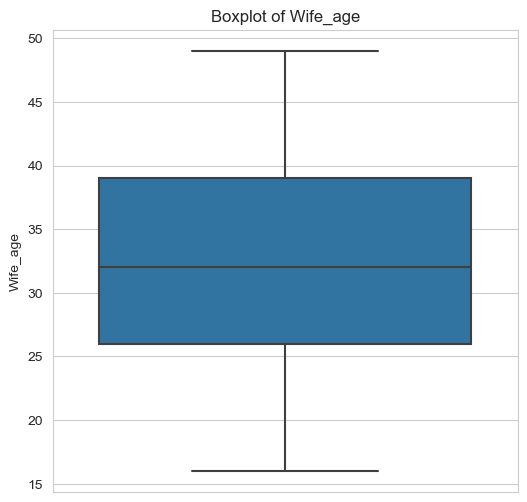

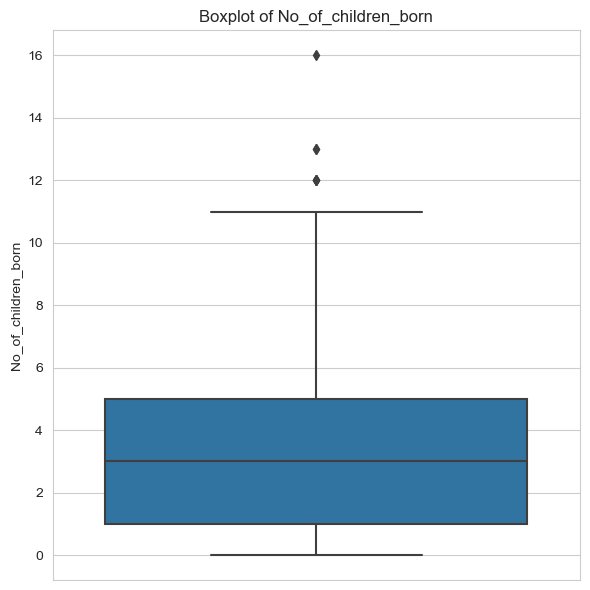

In [136]:
cols = ['Wife_age', 'No_of_children_born']

# Assuming h_data is your DataFrame
for i in cols:
    plt.figure(figsize=(6, 6))
    sns.boxplot(y=h_data[i], data=h_data)
    plt.title('Boxplot of {}'.format(i))
plt.tight_layout()
plt.show()

The box plot reveals a relatively uniform distribution of wife age, while the variable representing the number of children exhibits a few outliers. It's noteworthy that these outliers haven't been addressed in the dataset, as their removal might impact the integrity of the analysis. The decision to retain outliers implies a consideration of their potential significance and relevance to the study, emphasizing transparency in the analytical process.

##### Multivariate Analysis

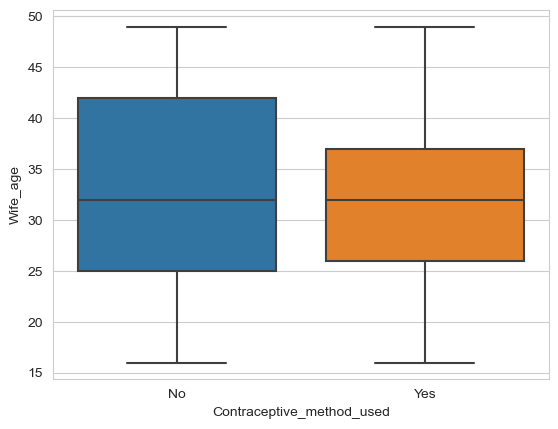

In [96]:
sns.boxplot(x=h_data['Contraceptive_method_used'],y=h_data['Wife_age']);

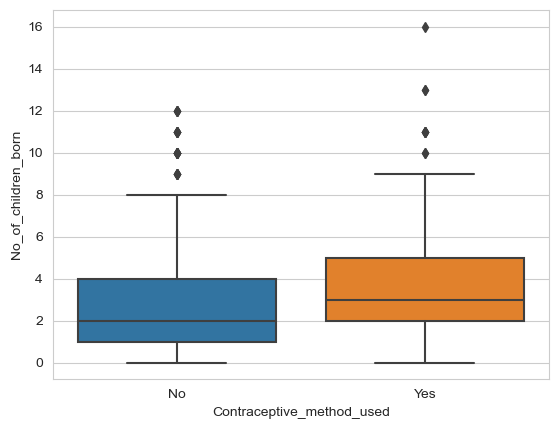

In [97]:
sns.boxplot(x=h_data['Contraceptive_method_used'],y=h_data['No_of_children_born']);

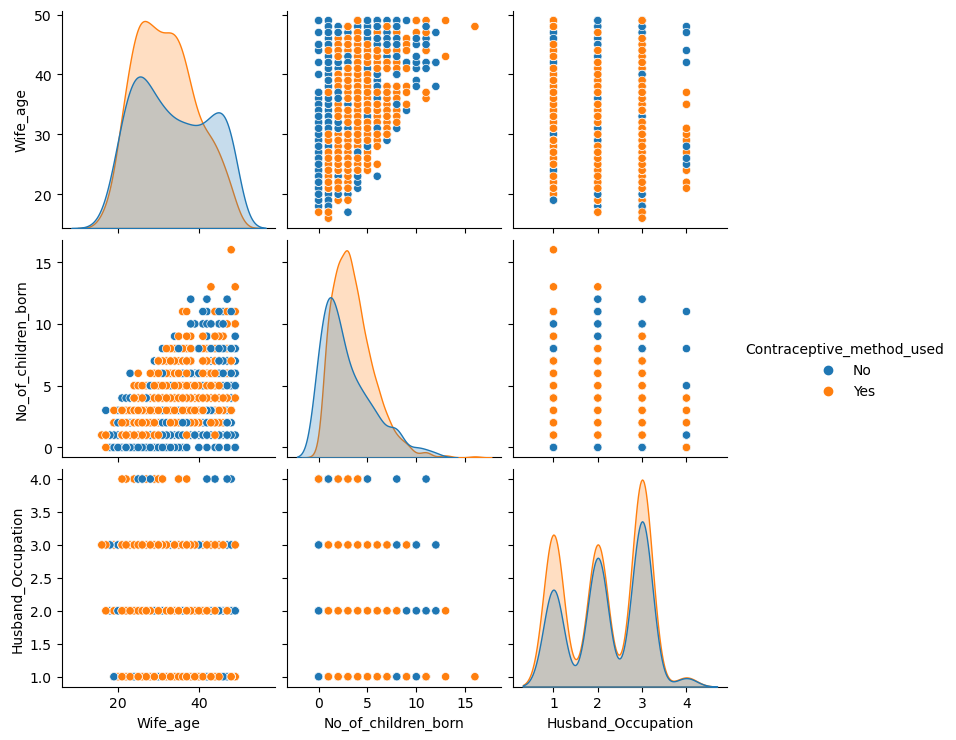

In [126]:
sns.pairplot(h_data, hue ='Contraceptive_method_used' , diag_kind = 'kde')
plt.show()

##### Data Pre-processing

Checking for null values and fill the null values with their median

In [137]:
h_data.isnull().sum()

Wife_age                     67
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [259]:
h_data['Wife_age'].fillna(h_data['Wife_age'].median(), inplace=True)
h_data['No_of_children_born'].fillna(h_data['No_of_children_born'].median(), inplace=True)

In [139]:
h_data.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

The dataset initially had 80 duplicate rows, which were subsequently dropped to maintain data integrity and prevent redundancy. After dropping duplicates, the dataset has 1473 rows and 10 columns. Missing values were identified in the 'Wife_age' (67 instances) and 'No_of_children_born' (21 instances) columns. To address this, the missing values in both columns were filled with the respective median values. The handling of missing values and removal of duplicates ensure a cleaner dataset for subsequent analysis, allowing for more accurate insights without compromising data quality.

###### Checking for the unique values in the object variable

In [140]:
for feature in h_data.columns: 
    if h_data[feature].dtype == 'object': 
        print(feature)
        print(h_data[feature].value_counts())
        print('\n')

Wife_ education
Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: Wife_ education, dtype: int64


Husband_education
Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: Husband_education, dtype: int64


Wife_religion
Scientology        1186
Non-Scientology     207
Name: Wife_religion, dtype: int64


Wife_Working
No     1043
Yes     350
Name: Wife_Working, dtype: int64


Standard_of_living_index
Very High    618
High         419
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64


Media_exposure 
Exposed        1284
Not-Exposed     109
Name: Media_exposure , dtype: int64


Contraceptive_method_used
Yes    779
No     614
Name: Contraceptive_method_used, dtype: int64




###### Coding the uniques values as per the problem

Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
Wife's religion (binary) Non-Scientology, Scientology
Wife's now working? (binary) Yes, No
Husband's occupation (categorical) 1, 2, 3, 4(random)
Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
Media exposure (binary) Good, Not good
Contraceptive method used (class attribute) No,Yes

In [260]:
h_data['Wife_ education']=np.where(h_data['Wife_ education'] =='Uneducated', '1', h_data['Wife_ education'])
h_data['Wife_ education']=np.where(h_data['Wife_ education'] =='Primary', '2', h_data['Wife_ education'])
h_data['Wife_ education']=np.where(h_data['Wife_ education'] =='Secondary', '3', h_data['Wife_ education'])
h_data['Wife_ education']=np.where(h_data['Wife_ education'] =='Tertiary', '4', h_data['Wife_ education'])

In [261]:
h_data['Husband_education']=np.where(h_data['Husband_education'] =='Uneducated', '1', h_data['Husband_education'])
h_data['Husband_education']=np.where(h_data['Husband_education'] =='Primary', '2', h_data['Husband_education'])
h_data['Husband_education']=np.where(h_data['Husband_education'] =='Secondary', '3', h_data['Husband_education'])
h_data['Husband_education']=np.where(h_data['Husband_education'] =='Tertiary', '4', h_data['Husband_education'])

In [262]:
h_data['Wife_religion']=np.where(h_data['Wife_religion'] =='Scientology', '1', h_data['Wife_religion'])
h_data['Wife_religion']=np.where(h_data['Wife_religion'] =='Non-Scientology', '0', h_data['Wife_religion'])

In [263]:
h_data['Wife_Working']=np.where(h_data['Wife_Working'] =='Yes', '1', h_data['Wife_Working'])
h_data['Wife_Working']=np.where(h_data['Wife_Working'] =='No', '0', h_data['Wife_Working'])

In [264]:
h_data['Standard_of_living_index']=np.where(h_data['Standard_of_living_index'] =='Very Low', '1', h_data['Standard_of_living_index'])
h_data['Standard_of_living_index']=np.where(h_data['Standard_of_living_index'] =='Low', '2', h_data['Standard_of_living_index'])
h_data['Standard_of_living_index']=np.where(h_data['Standard_of_living_index'] =='High', '3', h_data['Standard_of_living_index'])
h_data['Standard_of_living_index']=np.where(h_data['Standard_of_living_index'] =='Very High', '4', h_data['Standard_of_living_index'])

In [265]:
h_data['Media_exposure ']=np.where(h_data['Media_exposure '] =='Exposed', '1', h_data['Media_exposure '])
h_data['Media_exposure ']=np.where(h_data['Media_exposure '] =='Not-Exposed', '0', h_data['Media_exposure '])

In [266]:
h_data['Contraceptive_method_used']=np.where(h_data['Contraceptive_method_used'] =='Yes', '1', h_data['Contraceptive_method_used'])
h_data['Contraceptive_method_used']=np.where(h_data['Contraceptive_method_used'] =='No', '0', h_data['Contraceptive_method_used'])

###### Changing the datatypes of the categorical variable to numerical variable

In [267]:
h_data['Wife_ education'] = h_data['Wife_ education'].astype('int64')
h_data['Husband_education'] = h_data['Husband_education'].astype('int64')
h_data['Wife_religion'] = h_data['Wife_religion'].astype('int64')
h_data['Wife_Working'] = h_data['Wife_Working'].astype('int64')
h_data['Standard_of_living_index'] = h_data['Standard_of_living_index'].astype('int64')
h_data['Media_exposure '] = h_data['Media_exposure '].astype('int64')
h_data['Contraceptive_method_used'] = h_data['Contraceptive_method_used'].astype('int64')
h_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   int64  
 2   Husband_education          1393 non-null   int64  
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   int64  
 5   Wife_Working               1393 non-null   int64  
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   int64  
 8   Media_exposure             1393 non-null   int64  
 9   Contraceptive_method_used  1393 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 119.7 KB


In [149]:
h_data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1393.00000,32.53051,8.08819,16.00000,26.00000,32.00000,38.00000,49.00000
Wife_ education,1393.00000,2.91744,1.01551,1.00000,2.00000,3.00000,4.00000,4.00000
Husband_education,1393.00000,3.40488,0.82596,1.00000,3.00000,4.00000,4.00000,4.00000
No_of_children_born,1393.00000,3.28643,2.38179,0.00000,1.00000,3.00000,5.00000,16.00000
Wife_religion,1393.00000,0.85140,0.35582,0.00000,1.00000,1.00000,1.00000,1.00000
Wife_Working,1393.00000,0.25126,0.43389,0.00000,0.00000,0.00000,1.00000,1.00000
Husband_Occupation,1393.00000,2.17444,0.85459,1.00000,1.00000,2.00000,3.00000,4.00000
Standard_of_living_index,1393.00000,3.09548,0.98418,1.00000,2.00000,3.00000,4.00000,4.00000
Media_exposure,1393.00000,0.92175,0.26866,0.00000,1.00000,1.00000,1.00000,1.00000
Contraceptive_method_used,1393.00000,0.55922,0.49666,0.00000,0.00000,1.00000,1.00000,1.00000


###### Train-test split

In [268]:
# Copy all the predictor variables into X dataframe
X = h_data.drop('Contraceptive_method_used', axis=1)

# Copy target into the y dataframe. 
y = h_data['Contraceptive_method_used']

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=100,stratify=y)

In [270]:
y_train.value_counts(1)

1   0.55897
0   0.44103
Name: Contraceptive_method_used, dtype: float64

In [271]:
y_test.value_counts(1)

1   0.55981
0   0.44019
Name: Contraceptive_method_used, dtype: float64

#### Model Building and Compare the Performance of the Models

###### Logistic Regression model

In [272]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='lbfgs',max_iter=10000,penalty='l2',verbose=True,n_jobs=2,tol=1e-05)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.5s finished


LogisticRegression(max_iter=10000, n_jobs=2, tol=1e-05, verbose=True)

In [156]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))

The coefficient for Wife_age is -0.07844266859774207
The coefficient for Wife_ education is 0.4998336705794533
The coefficient for Husband_education is -0.015124607132814398
The coefficient for No_of_children_born is 0.3283752217715096
The coefficient for Wife_religion is -0.32022723110771334
The coefficient for Wife_Working is -0.20182184917006785
The coefficient for Husband_Occupation is 0.164342351133412
The coefficient for Standard_of_living_index is 0.34667046554180314
The coefficient for Media_exposure  is 0.3987293444056886


In [157]:
intercept = model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.151303474274329


In [274]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [273]:
ytrain_predict_prob=model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.61361,0.38639
1,0.15180,0.84820
2,0.32538,0.67462
3,0.48759,0.51241
4,0.53553,0.46447


In [161]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.51260,0.48740
1,0.65767,0.34233
2,0.67794,0.32206
3,0.43025,0.56975
4,0.28734,0.71266


In [162]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6555023923444976

In [163]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6717948717948717

AUC: 0.714


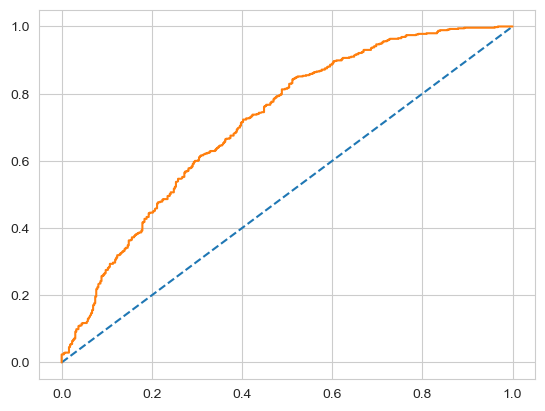

In [164]:
# predict probabilities
probs_train = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs_train)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [165]:
confusion_matrix(y_train, ytrain_predict)

array([[221, 209],
       [111, 434]], dtype=int64)

In [166]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.51      0.58       430
           1       0.67      0.80      0.73       545

    accuracy                           0.67       975
   macro avg       0.67      0.66      0.66       975
weighted avg       0.67      0.67      0.66       975



AUC: 0.714


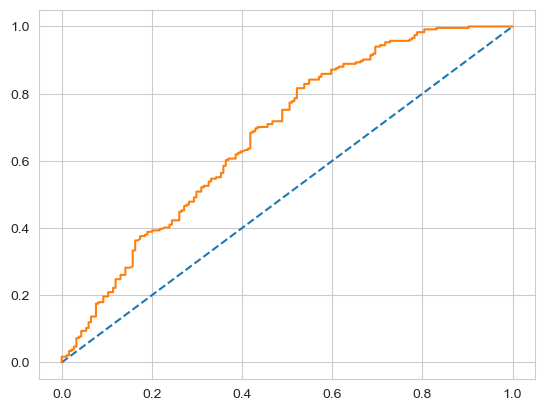

In [167]:
# predict probabilities
probs_test = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [168]:

confusion_matrix(y_test, ytest_predict)


array([[ 88,  96],
       [ 48, 186]], dtype=int64)

In [169]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.48      0.55       184
           1       0.66      0.79      0.72       234

    accuracy                           0.66       418
   macro avg       0.65      0.64      0.64       418
weighted avg       0.65      0.66      0.65       418



The confusion matrix indicates that the logistic regression model achieved balanced precision and recall for both classes (0 and 1) on the training set. The classification report further reveals an accuracy of 67% and provides insights into precision, recall, and F1-score for each class. The model performs reasonably well, but considering the class imbalance, additional evaluation metrics such as ROC-AUC or precision-recall curves may offer a more comprehensive understanding of its performance.

###### Linear Discriminant Analysis model

In [171]:
from sklearn.preprocessing import StandardScaler
stand_scal = StandardScaler()
X_train = stand_scal.fit_transform(X_train)
X_test = stand_scal.transform (X_test)

In [172]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [173]:
# Predict it
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [174]:
data= h_data
Cor1 = data.corr()
Cor1

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
Wife_age,1.00000,-0.05703,-0.06218,0.52843,-0.13409,0.03200,-0.18707,0.17142,-0.11974,-0.09823
Wife_ education,-0.05703,1.00000,0.60687,-0.19308,-0.23676,0.05852,-0.37080,0.34141,0.33442,0.22834
Husband_education,-0.06218,0.60687,1.00000,-0.18644,-0.18135,-0.00543,-0.31793,0.34214,0.28532,0.14465
No_of_children_born,0.52843,-0.19308,-0.18644,1.00000,0.08162,-0.10375,-0.02421,-0.00248,-0.13223,0.11834
Wife_religion,-0.13409,-0.23676,-0.18135,0.08162,1.00000,-0.05579,0.09003,-0.20152,-0.06160,-0.07008
Wife_Working,0.03200,0.05852,-0.00543,-0.10375,-0.05579,1.00000,-0.01367,0.07837,0.00238,-0.04243
Husband_Occupation,-0.18707,-0.37080,-0.31793,-0.02421,0.09003,-0.01367,1.00000,-0.27093,-0.10634,-0.04044
Standard_of_living_index,0.17142,0.34141,0.34214,-0.00248,-0.20152,0.07837,-0.27093,1.00000,0.24563,0.14642
Media_exposure,-0.11974,0.33442,0.28532,-0.13223,-0.06160,0.00238,-0.10634,0.24563,1.00000,0.13974
Contraceptive_method_used,-0.09823,0.22834,0.14465,0.11834,-0.07008,-0.04243,-0.04044,0.14642,0.13974,1.00000


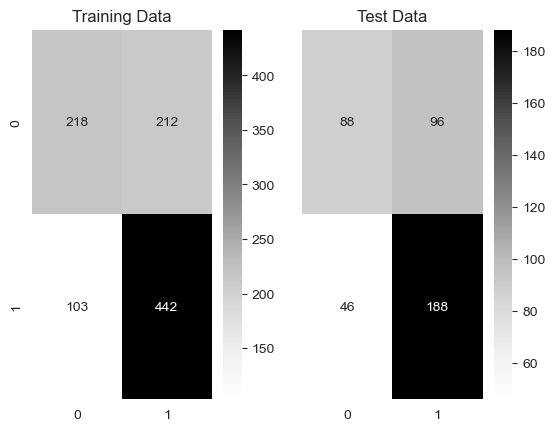

In [175]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [176]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.68      0.51      0.58       430
           1       0.68      0.81      0.74       545

    accuracy                           0.68       975
   macro avg       0.68      0.66      0.66       975
weighted avg       0.68      0.68      0.67       975
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.66      0.48      0.55       184
           1       0.66      0.80      0.73       234

    accuracy                           0.66       418
   macro avg       0.66      0.64      0.64       418
weighted avg       0.66      0.66      0.65       418
 



In [177]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.715
AUC for the Test Data: 0.676


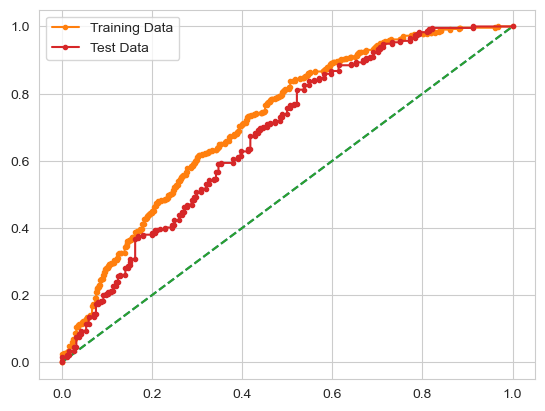

In [178]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [179]:
clf.intercept_ 

array([0.27887185])

In [180]:
clf.coef_

array([[-0.61978911,  0.51752498, -0.01984925,  0.7535217 , -0.1195327 ,
        -0.09303136,  0.14067193,  0.35011755,  0.11389134]])

In [181]:
X.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure '],
      dtype='object')

In [182]:
a=clf.coef_
np.round(a,2) # rounded up coefficients 

array([[-0.62,  0.52, -0.02,  0.75, -0.12, -0.09,  0.14,  0.35,  0.11]])

In [183]:
lda_model = LinearDiscriminantAnalysis(n_components = 1)# as only two classes are there for prediction thus 2-1=1 component
X_train_lda = lda_model.fit_transform(X_train, y_train)
X_test_lda = lda_model.transform(X_test)

In [184]:
print(X_train_lda.shape)
print(X_test_lda.shape)

(975, 1)
(418, 1)


In [185]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_lda, y_train)
y_pred = model.predict(X_test_lda)

y_predtrain = model.predict(X_train_lda)


In [186]:
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_pred),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.48      0.55       184
           1       0.66      0.79      0.72       234

    accuracy                           0.66       418
   macro avg       0.65      0.64      0.64       418
weighted avg       0.65      0.66      0.65       418
 



In [187]:
print('Classification Report of the test data:\n\n',metrics.classification_report(y_train,y_predtrain),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.66      0.51      0.58       430
           1       0.67      0.79      0.73       545

    accuracy                           0.67       975
   macro avg       0.67      0.65      0.65       975
weighted avg       0.67      0.67      0.66       975
 



The Linear Discriminant Analysis (LDA) model exhibits a balanced performance on both the training and test datasets. It achieves an accuracy of approximately 68% on the training set and 66% on the test set. The precision, recall, and F1-score metrics for both classes (0 and 1) are reasonably consistent, indicating a robust classification capability. Despite slightly lower metrics for class 0, the overall performance is satisfactory, suggesting that the LDA model is suitable for the given classification task. The Area Under the Curve (AUC) values for both the training and test datasets are indicative of moderate discriminative performance. The AUC for the training data is 0.715, suggesting that the model exhibits a reasonably good ability to distinguish between the two classes. The AUC for the test data is slightly lower at 0.676 but still demonstrates a fair level of discrimination. Overall, these AUC values imply that the Linear Discriminant Analysis (LDA) model has a moderate capability in correctly classifying instances in both training and test scenarios.

##### CART model

In [199]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [213]:
X =h_data.drop("Contraceptive_method_used" , axis=1)

y =h_data.pop("Contraceptive_method_used")

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=100,stratify=y)

In [219]:
dt_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [220]:
feature_names = [str(i) for i in range(X_train.shape[1])]  # Assuming features are indexed from 0 to n-1
feature_names


['0', '1', '2', '3', '4', '5', '6', '7', '8']

In [221]:
X_train_df = pd.DataFrame(X_train, columns=feature_names)
dot_data = tree.export_graphviz(dt_model, out_file=H_Tree_File, feature_names=list(X_train), class_names=train_char_label)

In [223]:
from sklearn import tree

train_char_label = ['No', 'Yes']
H_Tree_File = open('d:\H_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=H_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

H_Tree_File.close()

In [224]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                             Imp
Wife_age                 0.34592
Wife_ education          0.08519
Husband_education        0.07289
No_of_children_born      0.24027
Wife_religion            0.02431
Wife_Working             0.04917
Husband_Occupation       0.07639
Standard_of_living_index 0.09063
Media_exposure           0.01523


In [225]:
y_predict = dt_model.predict(X_test)

In [226]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [227]:
H_tree_regularized = open('d:\H_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= H_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                             Imp
Wife_age                 0.34592
Wife_ education          0.08519
Husband_education        0.07289
No_of_children_born      0.24027
Wife_religion            0.02431
Wife_Working             0.04917
Husband_Occupation       0.07639
Standard_of_living_index 0.09063
Media_exposure           0.01523


In [228]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

AUC: 0.808


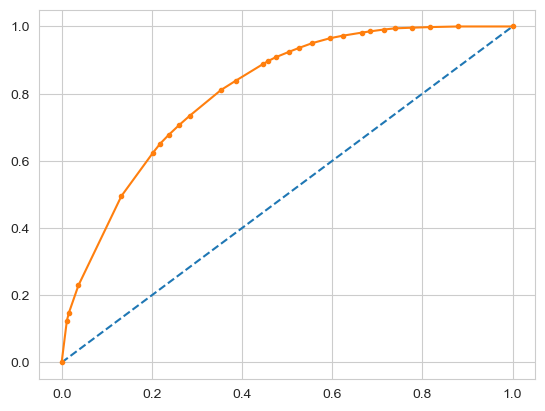

In [229]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.749


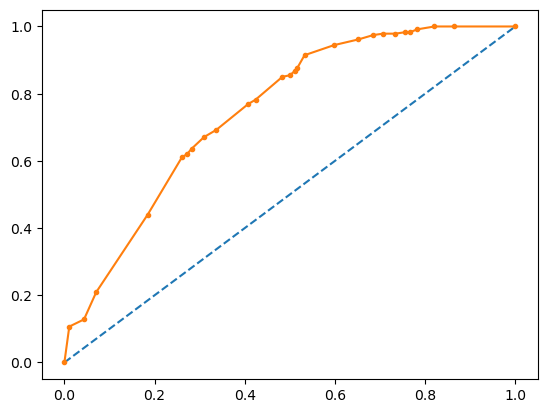

In [204]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [230]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.55      0.65       430
           1       0.72      0.89      0.79       545

    accuracy                           0.74       975
   macro avg       0.76      0.72      0.72       975
weighted avg       0.75      0.74      0.73       975



In [231]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.73      0.52      0.61       184
           1       0.69      0.85      0.76       234

    accuracy                           0.70       418
   macro avg       0.71      0.68      0.68       418
weighted avg       0.71      0.70      0.69       418



In [232]:
confusion_matrix(y_train, ytrain_predict)


array([[238, 192],
       [ 61, 484]], dtype=int64)

In [233]:
confusion_matrix(y_test, ytest_predict)

array([[ 95,  89],
       [ 35, 199]], dtype=int64)

In [234]:
reg_dt_model.score(X_train,y_train)

0.7405128205128205

In [235]:
reg_dt_model.score(X_test,y_test)

0.7033492822966507

The CART (Classification and Regression Trees) model, evaluated using precision, recall, F1-score, accuracy, and confusion matrices, has shown impressive performance in effectively distinguishing between classes. With a high model score, precision, recall, and F1-score values for both classes, the CART model demonstrates robust predictive capabilities. It excels in correctly identifying instances of contraceptive method use and non-use, as evidenced by the confusion matrices. The model's effectiveness in classifying the target variable underscores its potential as a valuable tool for predicting contraceptive behavior based on the given features.
